# Data Cleaning

In [2]:

# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


### Variables or columns that have a single value should probably be removed from your dataset

In [3]:
from pandas import read_csv
# load the dataset
df = read_csv('data/oil-spill.csv', header=None) 
print(df.shape)

counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]

(937, 50)


In [5]:
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

[22]
(937, 49)


In [7]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100 
  print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [9]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('data/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [14]:

# delete columns where number of unique values is less than 1% of the rows
from pandas import read_csv
# load the dataset
df = read_csv('data/oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1] 
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


In [15]:
# example of applying the variance threshold for feature selection
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold # load the dataset
df = read_csv('data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


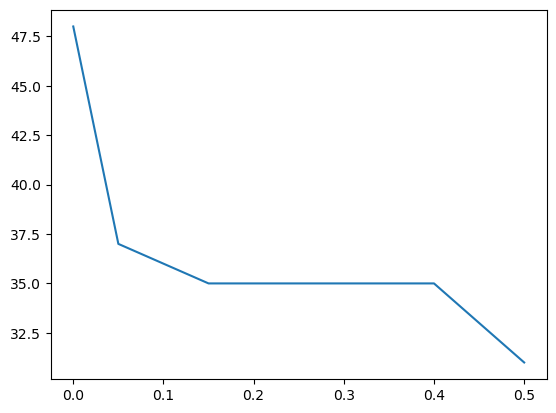

In [17]:

# explore the effect of the variance thresholds on the number of selected features
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold 
from matplotlib import pyplot
# load the dataset
df = read_csv('data/oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features)) # store the result
  results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

## Outlier Identification and Removal

In [18]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off # identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


## Removing outliers from the dataset

In [20]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('data/housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements

X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
MAE: 3.356


## How to Mark and Remove Missing Data